# Проект 8. Сборный проект по золотодобыче.

Исходные данные - данные параметров добычи и очистки золотоносной руды на разных стадиях технологического процесса. 

Задача - подготовить прототип модели машинного обучения, модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

#### Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.

# 1. Подготовка данных

Импортируем нужные библиотеки, модели и методы, атакже три датасета:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

converters = {
    'date': lambda d: pd.to_datetime(d, format='%Y-%m-%d %H:%M:%S')
}

df_train = pd.read_csv('/datasets/gold_recovery_train.csv', converters=converters, index_col='date')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv', converters=converters, index_col='date')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv', converters=converters, index_col='date')

Исследуем тренировочный набор:

In [2]:
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

In [4]:
df_train.isna().sum()

final.output.concentrate_ag                             72
final.output.concentrate_pb                             72
final.output.concentrate_sol                           370
final.output.concentrate_au                             71
final.output.recovery                                 1521
final.output.tail_ag                                    66
final.output.tail_pb                                   183
final.output.tail_sol                                  145
final.output.tail_au                                    66
primary_cleaner.input.sulfate                         1307
primary_cleaner.input.depressant                      1262
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         985
primary_cleaner.output.concentrate_ag                   82
primary_cleaner.output.concentrate_pb                  358
primary_cleaner.output.concentrate_sol                 636
primary_cleaner.output.concentrate_au                   

достаточно много пропусков, необходимо их предобработать

In [5]:
df_train.shape

(16860, 86)

In [6]:
df_train_droped = df_train.dropna()
df_train_droped.shape

(11017, 86)

Создал отдельный датасет для проверки задания на recovery.

In [7]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

In [8]:
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                    

In [10]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

## 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

С = rougher.output.concentrate_au  

Ф = rougher.input.feed_au 

Т = rougher.output.tail_au

In [11]:
def rougher_recovery(row):
    c = row['rougher.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']
    recovery_function = ((c * (f - t)) / (f * (c - t))) * 100
    return recovery_function
#df_train['rougher_recovery_function'] = rougher_recovery(df_train)
df_train_droped['rougher_recovery_function'] = df_train_droped.apply(rougher_recovery, axis=1)

df_train_droped = df_train_droped.replace([np.inf, -np.inf], np.nan).dropna()
df_train_droped.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_recovery_function
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
2016-01-15 01:00:00,6.029369,9.96

In [12]:
table_recovery = df_train_droped['rougher.output.recovery'].replace([np.inf, -np.inf], np.nan).dropna() #.value_counts()
function_recovery = df_train_droped['rougher_recovery_function'].replace([np.inf, -np.inf], np.nan).dropna() #.value_counts()
print(table_recovery.head())
print(function_recovery.head())
print()
print(mean_absolute_error(table_recovery, function_recovery))

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64
date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher_recovery_function, dtype: float64

9.555596961987514e-15


МАЕ между готовым столбцом и рассчитанным мной стремится к нулю, что говорит о том, что данный столбец верный и ему можно доверять. Пришло время исследовать следующий пункт

## 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [13]:
df_train.columns.to_list()

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floa

In [14]:
df_test.columns.to_list()

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

In [15]:
df1 = df_train.columns.to_list()
df2 = df_test.columns.to_list()

result = list(set(df1) - set(df2))
result

['primary_cleaner.output.tail_ag',
 'rougher.output.concentrate_au',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.tail_sol',
 'primary_cleaner.output.tail_pb',
 'rougher.output.tail_ag',
 'final.output.recovery',
 'final.output.concentrate_pb',
 'rougher.output.tail_au',
 'final.output.tail_ag',
 'final.output.concentrate_sol',
 'final.output.concentrate_ag',
 'rougher.output.tail_pb',
 'final.output.tail_au',
 'primary_cleaner.output.tail_sol',
 'rougher.output.concentrate_ag',
 'final.output.concentrate_au',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.concentrate_pb',
 'secondary_cleaner.output.tail_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'final.o

получен список со столбцами, которые есть в тренировочном наборе, но которых нет в тестовом. 

1.4. Проведите предобработку данных.

In [16]:
df_test = df_full.loc[df_test.index]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           5839 non-null float64
final.output.concentrate_pb                           5841 non-null float64
final.output.concentrate_sol                          5841 non-null float64
final.output.concentrate_au                           5841 non-null float64
final.output.recovery                                 5414 non-null float64
final.output.tail_ag                                  5839 non-null float64
final.output.tail_pb                                  5839 non-null float64
final.output.tail_sol                                 5730 non-null float64
final.output.tail_au                                  5841 non-null float64
primary_cleaner.input.sulfate                         5554 non-null float64
primary_cleaner.input.depressant                      5572 non-null float64
primary_cleaner.input

date = to datetime
переведена при импорте

In [17]:
df_train = df_train.fillna(method='ffill')
df_train = df_train.dropna()
print(df_train.isna().sum())
print(df_train.shape)

final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au                 0
primary_cleaner.output.tail_ag                  

In [18]:
df_test = df_test.fillna(method='ffill')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           5856 non-null float64
final.output.concentrate_pb                           5856 non-null float64
final.output.concentrate_sol                          5856 non-null float64
final.output.concentrate_au                           5856 non-null float64
final.output.recovery                                 5856 non-null float64
final.output.tail_ag                                  5856 non-null float64
final.output.tail_pb                                  5856 non-null float64
final.output.tail_sol                                 5856 non-null float64
final.output.tail_au                                  5856 non-null float64
primary_cleaner.input.sulfate                         5856 non-null float64
primary_cleaner.input.depressant                      5856 non-null float64
primary_cleaner.input

выше была проведена. предобработка в виде заполения пропусков с помощью fillna(method='ffill'), затем контрольно были удалены пропуски, проверены размеры таблицы. для тестовой выборки добавлены столбцы из полного датасета через их индексы

# 2. Анализ данных

## 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

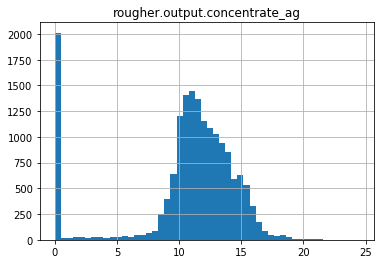

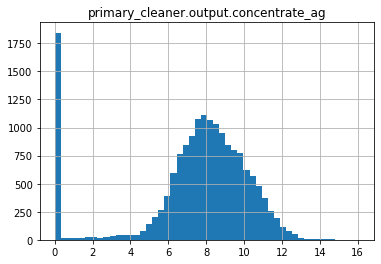

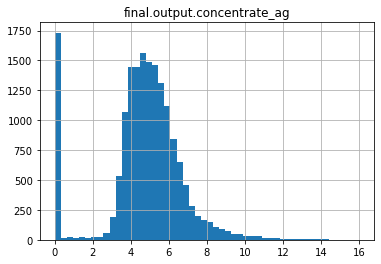

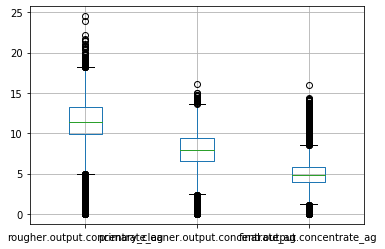

       rougher.output.concentrate_ag  primary_cleaner.output.concentrate_ag  \
count                   16860.000000                           16860.000000   
mean                       10.541930                               7.390585   
std                         4.486629                               3.135757   
min                         0.000000                               0.000000   
25%                         9.953223                               6.592263   
50%                        11.444529                               7.985558   
75%                        13.267408                               9.393336   
max                        24.480271                              16.081632   

       final.output.concentrate_ag  
count                 16860.000000  
mean                      4.699066  
std                       2.111997  
min                       0.000000  
25%                       3.958988  
50%                       4.860663  
75%                       5.8

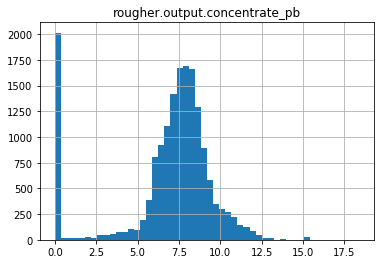

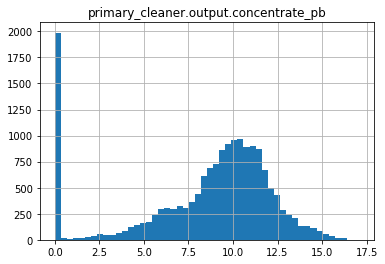

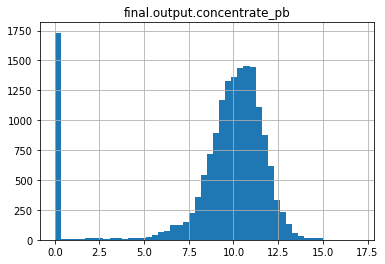

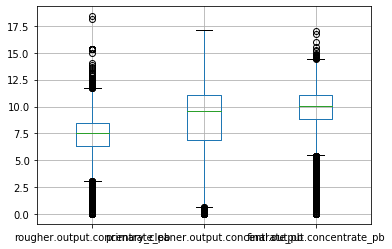

       rougher.output.concentrate_pb  primary_cleaner.output.concentrate_pb  \
count                   16860.000000                           16860.000000   
mean                        6.861249                               8.493673   
std                         2.959401                               3.909885   
min                         0.000000                               0.000000   
25%                         6.331015                               6.918728   
50%                         7.578584                               9.556796   
75%                         8.501206                              11.100156   
max                        18.394042                              17.081278   

       final.output.concentrate_pb  
count                 16860.000000  
mean                      9.080638  
std                       3.428085  
min                       0.000000  
25%                       8.803975  
50%                      10.059206  
75%                      11.0

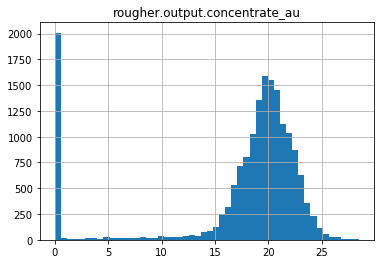

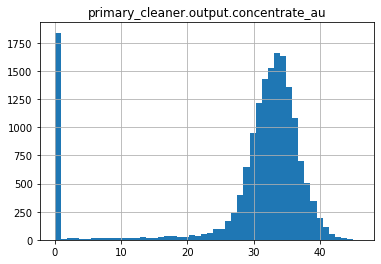

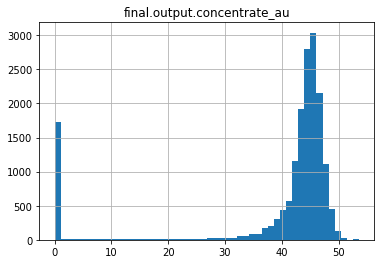

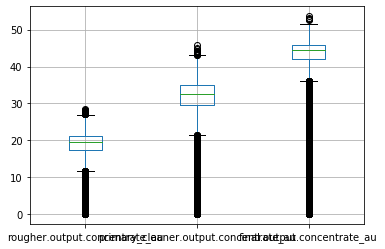

       rougher.output.concentrate_au  primary_cleaner.output.concentrate_au  \
count                   16860.000000                           16860.000000   
mean                       17.337662                              29.041786   
std                         6.985496                              11.124170   
min                         0.000000                               0.000000   
25%                        17.400564                              29.581985   
50%                        19.631078                              32.630490   
75%                        21.219480                              35.004503   
max                        28.522811                              45.933934   

       final.output.concentrate_au  
count                 16860.000000  
mean                     39.321631  
std                      14.095421  
min                       0.000000  
25%                      42.003201  
50%                      44.484966  
75%                      45.9

In [19]:
for name in ['ag', 'pb', 'au']:
    df_train.hist('rougher.output.concentrate_' + name, bins=50)
    df_train.hist('primary_cleaner.output.concentrate_' + name, bins=50)
    df_train.hist('final.output.concentrate_' + name, bins=50)
    plt.show()
    df_train[['rougher.output.concentrate_' + name, 'primary_cleaner.output.concentrate_' + name, 
              'final.output.concentrate_' + name]].boxplot()
    plt.show()
    print(df_train[['rougher.output.concentrate_' + name, 'primary_cleaner.output.concentrate_' + name, 
              'final.output.concentrate_' + name]].describe())
    print()
    print()

1) Концентрация серебра снижалась от стадии флотации к финальной стадии.

2) содержание свинца от флотации к финалу в целом увеличилась.

3) концентрация золота стремительно росла!

## 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

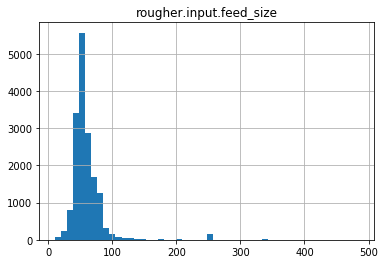

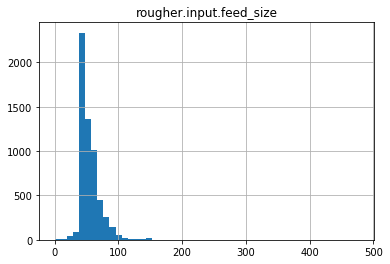

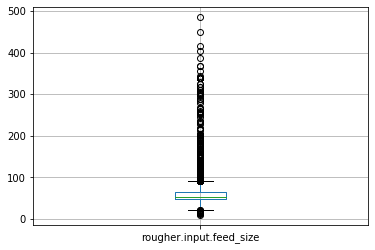

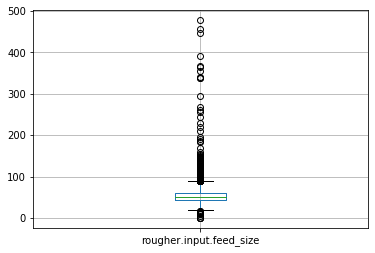

In [20]:
df_train.hist('rougher.input.feed_size', bins=50)
df_test.hist('rougher.input.feed_size', bins=50)
plt.show()
df_train[['rougher.input.feed_size']].boxplot()
plt.show()
df_test[['rougher.input.feed_size']].boxplot()
plt.show()

Распределение очень похоже, отличается частота, т.к. в тестовой выборке меньше число строк. По боксплотам сильной разницы также не видно.

## 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

In [21]:
df_train['rougher.output.concentrate_all'] = df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol']
df_train['primary_cleaner.output.concentrate_all'] = df_train['primary_cleaner.output.concentrate_au'] + df_train['primary_cleaner.output.concentrate_ag'] + df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_sol']
df_train['final.output.concentrate_all'] = df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol']

df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.concentrate_all,primary_cleaner.output.concentrate_all,final.output.concentrate_all
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-5

In [22]:
df_test['rougher.output.concentrate_all'] = df_test['rougher.output.concentrate_au'] \
+ df_test['rougher.output.concentrate_ag'] + df_test['rougher.output.concentrate_pb'] \
+ df_test['rougher.output.concentrate_sol']
df_test['primary_cleaner.output.concentrate_all'] = df_test['primary_cleaner.output.concentrate_au'] \
+ df_test['primary_cleaner.output.concentrate_ag'] + df_test['primary_cleaner.output.concentrate_pb'] \
+ df_test['primary_cleaner.output.concentrate_sol']
df_test['final.output.concentrate_all'] = df_test['final.output.concentrate_au'] \
+ df_test['final.output.concentrate_ag'] + df_test['final.output.concentrate_pb'] \
+ df_test['final.output.concentrate_sol']

df_test.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.concentrate_all,primary_cleaner.output.concentrate_all,final.output.concentrate_all
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,210.800909,14.993118,8.080000,1.005021,11.631910,12.706851,17.872038,28.364867,17.266279,4.148198,11.034524,6.587571,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,35236.090448,2173.703032,2102.438804,2.143822,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,15.734654,8.227045,33.791932,22.186207,89.993421,5.936471,0.747425,14.787965,2.371757,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,16.484844,4.413600,12.034406,5.560988,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.

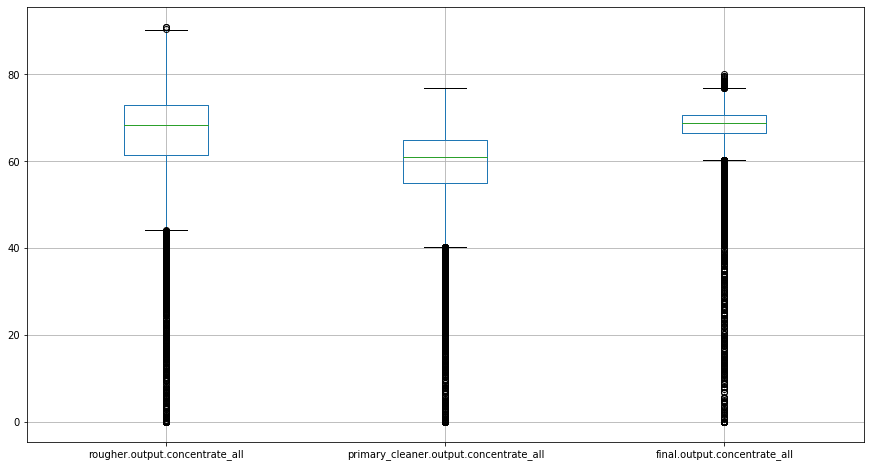

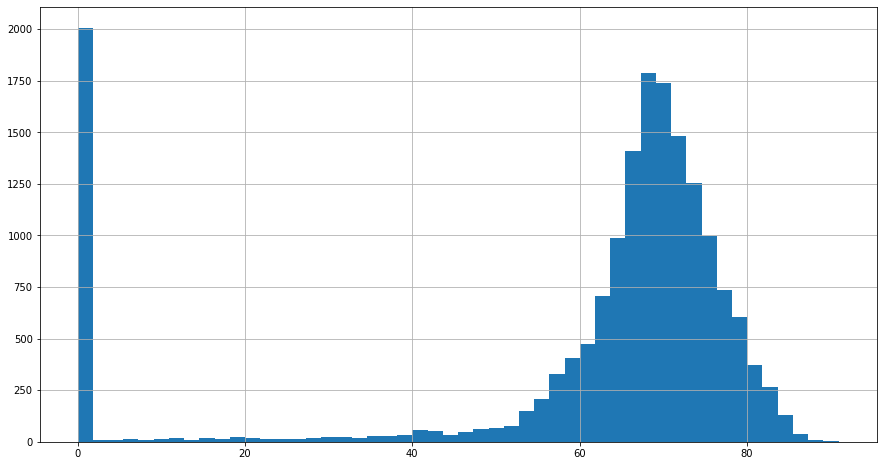

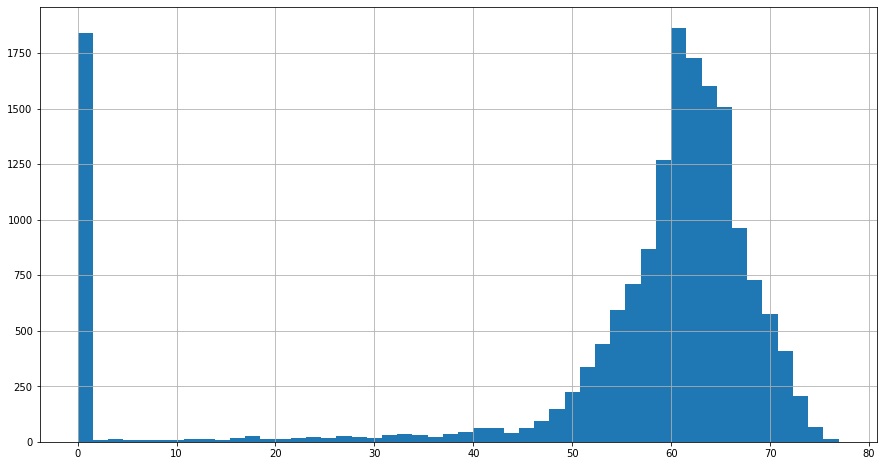

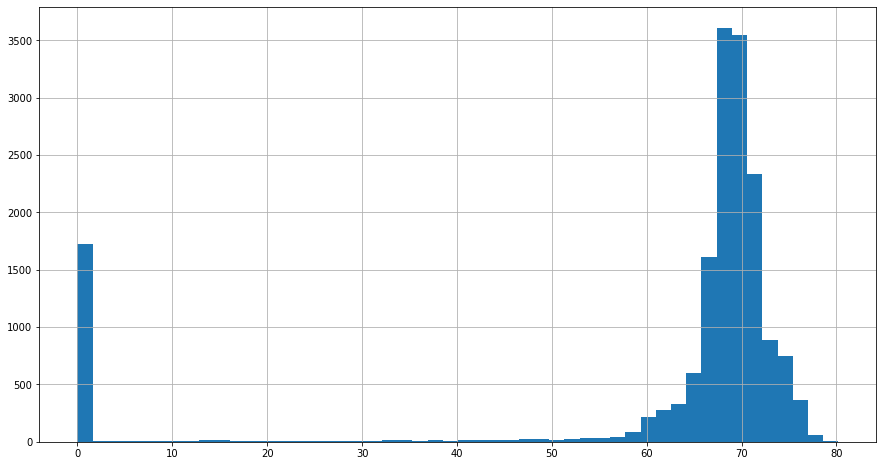

In [23]:
plt.figure(figsize=(15, 8))
df_train[['rougher.output.concentrate_all', 'primary_cleaner.output.concentrate_all', 'final.output.concentrate_all']].boxplot()
plt.show()
plt.figure(figsize=(15, 8))
df_train['rougher.output.concentrate_all'].hist(bins=50)
plt.show()
plt.figure(figsize=(15, 8))
df_train['primary_cleaner.output.concentrate_all'].hist(bins=50)
plt.show()
plt.figure(figsize=(15, 8))
df_train['final.output.concentrate_all'].hist(bins=50)
plt.show()

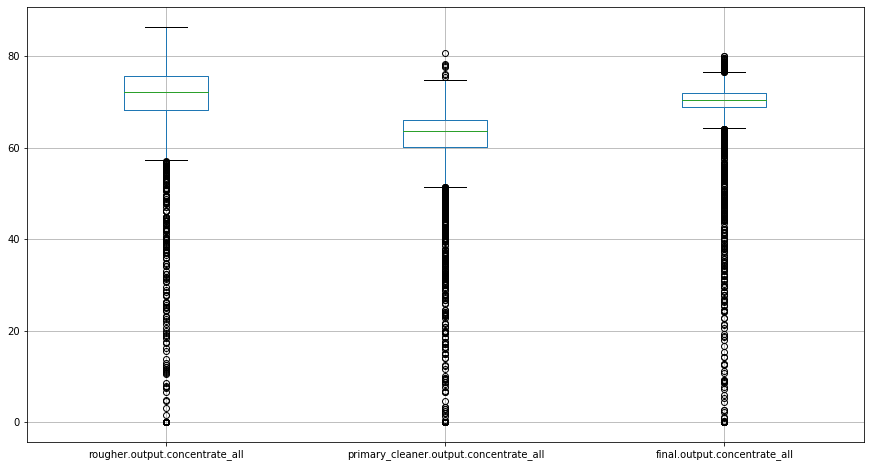

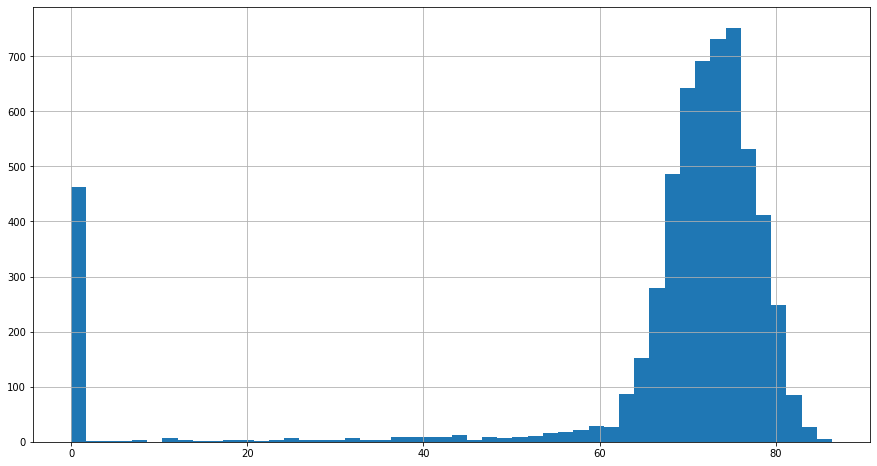

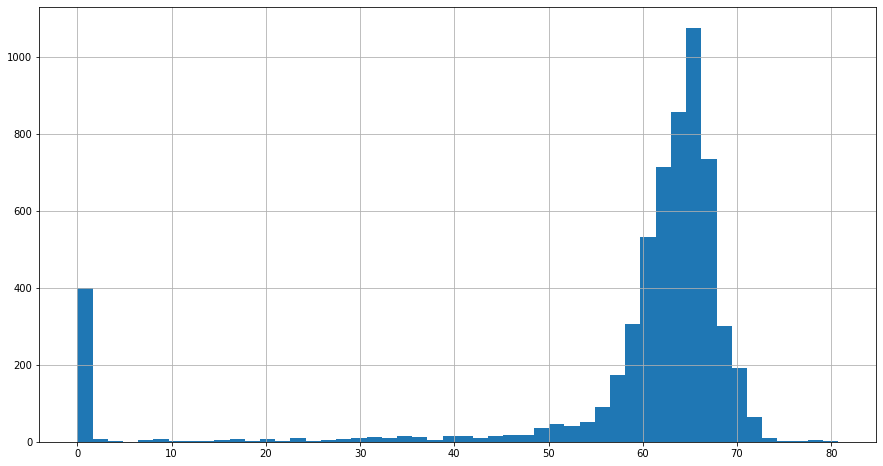

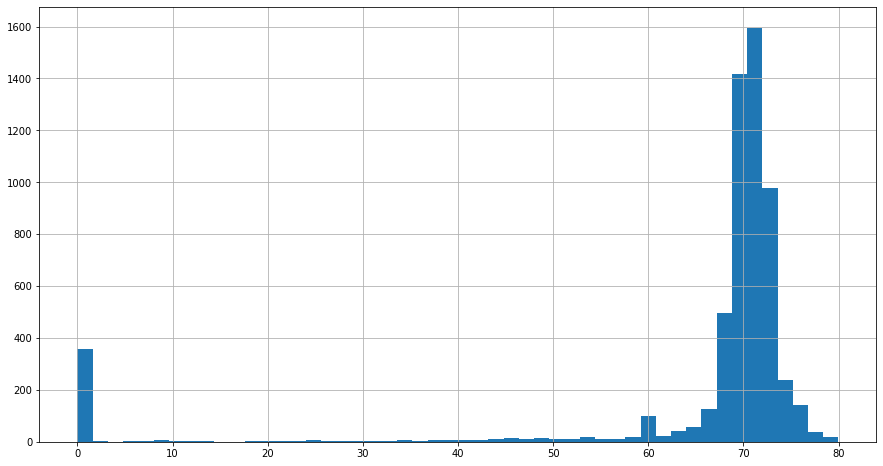

In [24]:
plt.figure(figsize=(15, 8))
df_test[['rougher.output.concentrate_all', 'primary_cleaner.output.concentrate_all', 'final.output.concentrate_all']].boxplot()
plt.show()
plt.figure(figsize=(15, 8))
df_test['rougher.output.concentrate_all'].hist(bins=50)
plt.show()
plt.figure(figsize=(15, 8))
df_test['primary_cleaner.output.concentrate_all'].hist(bins=50)
plt.show()
plt.figure(figsize=(15, 8))
df_test['final.output.concentrate_all'].hist(bins=50)
plt.show()

Аномалиями выглядят хвосты из нулевых значений с довольно большим количеством значений. Как это лучше удалить? просто сделать срез, в котором значения будут больше 0? 

На данном этапе я данные не удалял, так как суммарную концентрацию в чистом виде в модели не используем.

# 3. Модель

## 3.1. Напишите функцию для вычисления итоговой sMAPE.

In [25]:
def smape(target, predictions):
    smape = np.mean(abs(target - predictions)/((abs(target) + abs(predictions))/2))*100
    return smape
    
def smape_itog(rougher, final):
    smape_itog = 0.25 * rougher + 0.75 * final
    return smape_itog
    
print(smape(table_recovery, function_recovery))

1.158746681212613e-14


## 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

#### Разделим выборку для флотации и финальную выборку на тренировочный и валидационный датасеты, а также отмасштабируем все численные признаки.

In [26]:
target_rougher = df_train['rougher.output.recovery']
features_rougher = df_train.drop('rougher.output.recovery', axis=1)

features_rougher_train, features_rougher_valid, target_rougher_train, target_rougher_valid = train_test_split(
        features_rougher, target_rougher, test_size=0.25, random_state=12345)


target_final = df_train['final.output.recovery']
features_final = df_train.drop('final.output.recovery', axis=1)

features_final_train, features_final_valid, target_final_train, target_final_valid = train_test_split(
        features_final, target_final, test_size=0.25, random_state=12345)


scaler = StandardScaler()
scaler.fit(features_rougher_train)
features_rougher_train = scaler.transform(features_rougher_train)
features_rougher_valid = scaler.transform(features_rougher_valid)


scaler1 = StandardScaler()
scaler1.fit(features_final_train)
features_final_train = scaler1.transform(features_final_train)
features_final_valid = scaler1.transform(features_final_valid)


#### Для всех моделей оценены RMSE, r2_score, sMAPE.

### Попробуем поварьировать модель дерева решений в регрессии для флотации и финальной стадии.

In [27]:
%%time
best_model_rougher = None 
best_result_rougher = 10000
best_depth_rougher = 0
for depth in range(1, 10, 1):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_rougher_train, target_rougher_train) 
    predictions_rougher_valid = model.predict(features_rougher_valid) 
    result =  mean_squared_error(target_rougher_valid, predictions_rougher_valid) ** 0.5 
    if result < best_result_rougher:
        best_model_rougher = model
        best_result_rougher = result
        best_depth_rougher = depth
        r2_rougher = r2_score(target_rougher_valid, predictions_rougher_valid)
        smape_rougher = smape(target_rougher_valid, predictions_rougher_valid)
print("RMSE наилучшей модели на валидационной выборке:", best_result_rougher, "Количество деревьев:", best_depth_rougher, 
      'r2_score =', r2_rougher, 'sMAPE (rougher) =', smape_rougher)

RMSE наилучшей модели на валидационной выборке: 8.513477422406769 Количество деревьев: 8 r2_score = 0.7977204026031441 sMAPE (rougher) = 5.712338431961599
CPU times: user 5.3 s, sys: 0 ns, total: 5.3 s
Wall time: 5.31 s


In [28]:
%%time
best_model_final = None 
best_result_final = 10000
best_depth_final = 0
for depth in range(1, 10, 1):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_final_train, target_final_train) 
    predictions_final_valid = model.predict(features_final_valid) 
    result_final =  mean_squared_error(target_final_valid, predictions_final_valid) ** 0.5 
    if result_final < best_result_final:
        best_model_final = model
        best_result_final = result
        best_depth_final = depth
        r2_final = r2_score(target_final_valid, predictions_final_valid)
        smape_final = smape(target_final_valid, predictions_final_valid)
print("RMSE наилучшей модели на валидационной выборке:", best_result_final, "Количество деревьев:", best_depth_final, 
      'r2_score =', r2_final, 'sMAPE (final) =', smape_final)

RMSE наилучшей модели на валидационной выборке: 8.881979721694245 Количество деревьев: 9 r2_score = 0.6324879849090257 sMAPE (final) = 7.303427025820508
CPU times: user 5.36 s, sys: 0 ns, total: 5.36 s
Wall time: 5.37 s


### Теперь исследуем модель случайного леса:

In [29]:
%%time
best_model_rougher = None
best_result_rougher = 10000
best_est_rougher = 0
best_depth_rougher = 0
for est in range(10, 50, 10):
    for depth in range (1, 10, 1):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_rougher_train, target_rougher_train) 
        predictions_rougher_valid = model.predict(features_rougher_valid) 
        result_rougher = mean_squared_error(target_rougher_valid, predictions_rougher_valid) ** 0.5 
        if result_rougher < best_result_rougher:
            best_model_rougher = model
            best_result_rougher = result
            best_est_rougher = est
            best_depth_rougher = depth
            r2_rougher = r2_score(target_rougher_valid, predictions_rougher_valid)
            smape_rougher = smape(target_rougher_valid, predictions_rougher_valid)
        
print("RMSE наилучшей модели на валидационной выборке:", best_result_rougher, "Количество деревьев:", best_est_rougher, 
      "Максимальная глубина:", best_depth_rougher, 'r2 score =', r2_rougher, 'sMAPE (rougher) =', smape_rougher)

RMSE наилучшей модели на валидационной выборке: 8.881979721694245 Количество деревьев: 40 Максимальная глубина: 9 r2 score = 0.8857075796667041 sMAPE (rougher) = 9.590577709511566
CPU times: user 5min 30s, sys: 61.4 ms, total: 5min 30s
Wall time: 5min 30s


In [30]:
%%time
best_model_final = None
best_result_final = 10000
best_est_final = 0
best_depth_final = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_final_train, target_final_train) 
        predictions_final_valid = model.predict(features_final_valid) 
        result = mean_squared_error(target_final_valid, predictions_final_valid) ** 0.5 
        if result < best_result_final:
            best_model_final = model
            best_result_final = result
            best_est_final = est
            best_depth_final = depth
            r2_final = r2_score(target_final_valid, predictions_final_valid)
            smape_final = smape(target_final_valid, predictions_final_valid)
            
print("RMSE наилучшей модели на валидационной выборке:", best_result_final, "Количество деревьев:", best_est_final, 
      "Максимальная глубина:", best_depth_final, 'r2_score =', r2_final, 'sMAPE (final) =', smape_final)

RMSE наилучшей модели на валидационной выборке: 6.275333529023144 Количество деревьев: 50 Максимальная глубина: 10 r2_score = 0.7748085403491016 sMAPE (final) = 6.753046301616998
CPU times: user 10min 3s, sys: 91.8 ms, total: 10min 3s
Wall time: 10min 3s


### Попробуем модель линейной регрессии:

In [31]:
model = LinearRegression() 
model.fit(features_rougher_train, target_rougher_train) 
predictions_rougher_valid = model.predict(features_rougher_valid) 
r2_rougher = r2_score(target_rougher_valid, predictions_rougher_valid)
smape_rougher = smape(target_rougher_valid, predictions_rougher_valid)

result = mean_squared_error(target_rougher_valid, predictions_rougher_valid) 
print("RMSE модели линейной регрессии на валидационной выборке:", result, 'r2 score =', r2_rougher, 'sMAPE (rougher) =', smape_rougher)

RMSE модели линейной регрессии на валидационной выборке: 170.16241831724878 r2 score = 0.5251004562171478 sMAPE (rougher) = 14.65220473391734


In [32]:
model = LinearRegression() 
model.fit(features_final_train, target_final_train) 
predictions_final_valid = model.predict(features_final_valid) 

result = mean_squared_error(target_final_valid, predictions_final_valid)  
r2_final = r2_score(target_final_valid, predictions_final_valid)
smape_final = smape(target_final_valid, predictions_final_valid)
print("RMSE модели линейной регрессии на валидационной выборке:", result, 'r2_final=', r2_final, 'sMAPE (final) =', smape_final)

RMSE модели линейной регрессии на валидационной выборке: 76.9741675956209 r2_final= 0.5598271103922808 sMAPE (final) = 8.605598061379178


#### Лучше всего для стадии флотации себя показала модель дерева решений с глубиной 8, а для финальной - модель случайного леса с 50 эстиматорами и глубиной 10. Исследуем их дальше с помощью кросс-валидации, а также на тестовой выборке.

In [33]:
model_tree_rougher = DecisionTreeRegressor(random_state=12345, max_depth=8)
model_tree_rougher.fit(features_rougher_train, target_rougher_train) 
predictions_rougher_valid = model_tree_rougher.predict(features_rougher_valid) 
r2_rougher = r2_score(target_rougher_valid, predictions_rougher_valid)
print('r2 =', r2_rougher)
smape_rougher = smape(target_rougher_valid, predictions_rougher_valid)
print('smape =', smape_rougher)

from sklearn.model_selection import cross_val_score
cross = cross_val_score(model_tree_rougher, features_rougher_train, target_rougher_train, cv=3)
final_cross = cross.mean() 
print('r2_cross =',final_cross)

r2 = 0.7977204026031441
smape = 5.712338431961599
r2_cross = 0.8125328422466439


In [34]:
%%time
model_tree_final = RandomForestRegressor(random_state=12345, n_estimators=50, max_depth=10)
model_tree_final.fit(features_final_train, target_final_train) 
predictions_final_valid = model_tree_final.predict(features_final_valid) 
r2_final = r2_score(target_final_valid, predictions_final_valid)
print('r2 =', r2_final)
smape_final = smape(target_final_valid, predictions_final_valid)
print('smape =', smape_final)

cross = cross_val_score(model_tree_final, features_final_train, target_final_train, cv=3)
final_cross_final = cross.mean() 
print('r2_cross =', final_cross_final)

r2 = 0.7748085403491016
smape = 6.753046301616998
r2_cross = 0.7823970896887342
CPU times: user 1min 41s, sys: 19.9 ms, total: 1min 41s
Wall time: 1min 44s


In [35]:
smape_itog(smape_rougher, smape_final)

6.4928693342031485

### Теперь проверим на тестовой выборке

In [36]:
target_rougher_test = df_test['rougher.output.recovery']
features_rougher_test = df_test.drop('rougher.output.recovery', axis=1)

target_final_test = df_test['final.output.recovery']
features_final_test = df_test.drop('final.output.recovery', axis=1)

features_rougher_test = scaler.transform(features_rougher_test)
features_final_test = scaler.transform(features_final_test)

In [37]:
model_tree_rougher = DecisionTreeRegressor(random_state=12345, max_depth=8)
model_tree_rougher.fit(features_rougher_train, target_rougher_train) 
predictions_rougher_test = model_tree_rougher.predict(features_rougher_test) 
r2_rougher_test = r2_score(target_rougher_test, predictions_rougher_test)
print('r2 =', r2_rougher_test)
smape_rougher_test = smape(target_rougher_test, predictions_rougher_test)
print('smape =', smape_rougher_test)

cross = cross_val_score(model_tree_rougher, features_rougher_train, target_rougher_train, cv=3)
final_cross_rougher = cross.mean()
print('r2_cross =', final_cross_rougher)

r2 = -0.37268867333593936
smape = 10.9348522467205
r2_cross = 0.8125328422466439


In [38]:
%%time
model_tree_final = RandomForestRegressor(random_state=12345, n_estimators=50, max_depth=10)
model_tree_final.fit(features_final_train, target_final_train) 
predictions_final_test = model_tree_final.predict(features_final_test) 
r2_final_test = r2_score(target_final_test, predictions_final_test)
print('r2 =', r2_final_test)
smape_final_test = smape(target_final_test, predictions_final_test)
print('smape =', smape_final_test)

cross = cross_val_score(model_tree_final, features_final_train, target_final_train, cv=3)
final_cross_final = cross.mean()
print('r2_cross =', final_cross_final)

r2 = -2.4806874269286663
smape = 28.641863069606693
r2_cross = 0.7823970896887342
CPU times: user 1min 48s, sys: 48 ms, total: 1min 48s
Wall time: 1min 51s


- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке